In [1]:
# -------------------------------
#  Imports
# -------------------------------
import numpy as np
from random import random
import matplotlib.pyplot as plt

In [3]:
# -------------------------------
#  Settings
# -------------------------------
N = 3360  # Divisible by  1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 15, 16, 20, 21, 24, 28,
            #              30, 32, 35, 40, 42, 48, 56, 60

clusters = 2

range_masses = np.array([1.0, 2.0])

centers_x = np.array([-100, 100])
centers_y = np.array([0, 0])
centers_z = np.array([0, 0])

ranges_coords_x = np.array([[-50, 50], [-50, 50]])
ranges_coords_y = np.array([[-100, 100], [-100, 100]])
ranges_coords_z = np.array([[0, 0], [0, 0]])

ranges_vels_x = np.array([[30, 50], [-50, -30]])
ranges_vels_y = np.array([[-5, 5], [-5, 5]])
ranges_vels_z = np.array([[0, 0], [0, 0]])

printstep = 50
steps = 5000
delta = 0.0003
eps = 0.1
filename = "config-MPI_Clusters_Speedtest_4"

%matplotlib inline

In [4]:
# -------------------------------
#  Generate clusters
# -------------------------------
N_cluster = int(N / clusters)
len_mass = range_masses[1] - range_masses[0]

masses = np.zeros(N)
coords = np.zeros([N,3])
vels = np.zeros([N,3])

for i in range(0,N):
    masses[i] = random() * len_mass + range_masses[0]
    
for k in range(0,clusters):
    for i in range(0,N_cluster):
        coords[k*N_cluster + i, 0] = random() * (ranges_coords_x[k,1] - ranges_coords_x[k,0]) + ranges_coords_x[k,0] + centers_x[k]
        coords[k*N_cluster + i, 1] = random() * (ranges_coords_y[k,1] - ranges_coords_y[k,0]) + ranges_coords_y[k,0] + centers_y[k]
        coords[k*N_cluster + i, 2] = random() * (ranges_coords_z[k,1] - ranges_coords_z[k,0]) + ranges_coords_z[k,0] + centers_z[k]
        
        vels[k*N_cluster + i, 0] = random() * (ranges_vels_x[k,1] - ranges_vels_x[k,0]) + ranges_vels_x[k,0]
        vels[k*N_cluster + i, 1] = random() * (ranges_vels_y[k,1] - ranges_vels_y[k,0]) + ranges_vels_y[k,0]
        vels[k*N_cluster + i, 2] = random() * (ranges_vels_z[k,1] - ranges_vels_z[k,0]) + ranges_vels_z[k,0]

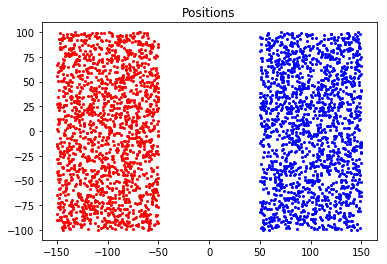

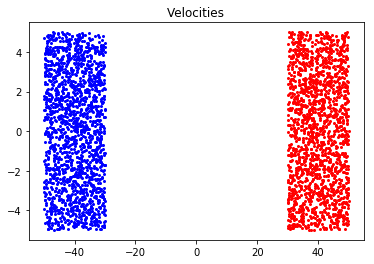

In [5]:
# -------------------------------
#  Show clusters
# -------------------------------
colors = ["red", "blue"]
plt.figure()
for k in range(0,clusters):
    for i in range(0,N_cluster):
        plt.plot(coords[k*N_cluster + i, 0], coords[k*N_cluster + i, 1], c=colors[k], marker="o", markersize=2)
        
plt.title("Positions")
plt.show()

plt.figure()
for k in range(0,clusters):
    for i in range(0,N_cluster):
        plt.plot(vels[k*N_cluster + i, 0], vels[k*N_cluster + i, 1], c=colors[k], marker="o", markersize=2)
        
plt.title("Velocities")
plt.show()

In [6]:
# -------------------------------
#  Write to file
# -------------------------------

file = open("../Configs/"+filename+".txt","w") 
 
file.write('Configuration Type\n')
file.write('0\n\n')

file.write('PrintStep\n')
file.write(str(printstep) + '\n\n')

file.write('Steps\n')
file.write(str(steps) + '\n\n')

file.write('Delta\n')
file.write(str(delta) + '\n\n')

file.write('Epsilon\n')
file.write(str(eps) + '\n\n')

file.write('Number of Masspoints\n')
file.write(str(N) + '\n\n')

file.write('Masses\n')
for i in range(0,N):
    file.write(str(masses[i]) + '\n')
file.write('\n')

file.write('Coordinates\n')
for k in range(0,clusters):
    for i in range(0,N_cluster):
        file.write(str(coords[k*N_cluster + i, 0]) + ' , ' + str(coords[k*N_cluster + i, 1]) + ' , ' + str(coords[k*N_cluster + i, 2]) + '\n')
file.write('\n')

file.write('Velocities\n')
for k in range(0,clusters):
    for i in range(0,N_cluster):
        file.write(str(vels[k*N_cluster + i, 0]) + ' , ' + str(vels[k*N_cluster + i, 1]) + ' , ' + str(vels[k*N_cluster + i, 2]) + '\n')
file.write('\n')

file.close() 